<a href="https://colab.research.google.com/github/Analia-Rivera/-Ejercicios/blob/main/Pre_entrega_3_ciberseguridad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRE ENTREGA 3:

CIBERSEGURIDAD.

En la pre entrega 2 empezamos a hablar de ciberseguridad y de la importancia de la misma a la hora de detectar los ataques lo mas rapido posible, para no tener pérdidas.

En esta ocasión seguimos con el mismo tema pero con otro dataset, en este caso utilizaremos [este dataset.](https://www.kaggle.com/datasets/shakirul09/cyber-crimes-dataset)
Nuestro objetivo es ver cuales fueron los países que más ataques tuvieron y de que tipo, cual fue el horario mas buscado para el ataque y la industria mas afectada.
Y por último si el ataque fue exitoso o no.

In [1]:
#importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [2]:
cb= pd.read_csv('//content/cybersecurity_large_synthesized_data.csv')
 #leemos el dataset

In [3]:
cb.head()
 #revisamos lo que contiene

,attack_type,target_system,outcome,timestamp,attacker_ip,target_ip,data_compromised_GB,attack_duration_min,security_tools_used,user_role,location,attack_severity,industry,response_time_min,mitigation_method
0,Phishing,Cloud Service,Failure,2024-04-03 11:13:15.083419,21.166.79.4,23.20.50.78,15.31,300,Firewall,Employee,Australia,2,Energy,164.0,Containment
1,DDoS,Email Server,Success,2024-02-03 20:51:56.083463,187.180.150.169,34.160.58.218,65.05,242,Endpoint Detection,Admin,Brazil,10,Retail,64.0,Reset Credentials
2,Zero-Day Exploit,Cloud Service,Success,2024-07-19 18:40:05.083472,57.161.159.140,213.142.125.206,48.99,120,Firewall,External User,Germany,7,Finance,87.0,Quarantine
3,SQL Injection,Email Server,Failure,2023-12-08 00:54:17.083478,207.108.16.104,4.104.193.49,16.29,286,MFA,Employee,Russia,3,Healthcare,23.0,Patch
4,Zero-Day Exploit,IoT Device,Failure,2024-07-23 05:38:20.083483,98.122.15.31,57.66.53.194,87.66,4,Firewall,Contractor,UK,6,Finance,129.0,Containment


In [4]:
cb.shape
  #mostramos cuantas features y filas contiene

(42839, 15)

In [5]:
cb.columns
  #mostramos los nombres

Index(['attack_type', 'target_system', 'outcome', 'timestamp', 'attacker_ip',
       'target_ip', 'data_compromised_GB', 'attack_duration_min',
       'security_tools_used', 'user_role', 'location', 'attack_severity',
       'industry', 'response_time_min', 'mitigation_method'],
      dtype='object')

In [6]:
cb.dtypes
  #vemos el tipo de datos

,0
attack_type,object
target_system,object
outcome,object
timestamp,object
attacker_ip,object
target_ip,object
data_compromised_GB,float64
attack_duration_min,int64
security_tools_used,object
user_role,object


In [7]:
cb.isnull().sum()
  #vemos los faltantes


,0
attack_type,0
target_system,0
outcome,0
timestamp,0
attacker_ip,0
target_ip,0
data_compromised_GB,0
attack_duration_min,0
security_tools_used,0
user_role,0


si bien no hay ningun valor faltante, las revisamos por si hay algo raro o faltante que no se ve


In [8]:
for column in cb.columns:
    print(column)
    print(cb[column].unique())

attack_type
['Phishing' 'DDoS' 'Zero-Day Exploit' 'SQL Injection' 'Malware'
 'Ransomware' 'Brute Force' 'Cross-Site Scripting']
target_system
['Cloud Service' 'Email Server' 'IoT Device' 'User Account'
 'Network Switch' 'Web Server' 'Database' 'API']
outcome
['Failure' 'Success']
timestamp
['2024-04-03 11:13:15.083419' '2024-02-03 20:51:56.083463'
 '2024-07-19 18:40:05.083472' ... '2023-09-14 02:02:19.310911'
 '2024-01-04 09:08:01.310916' '2023-11-23 00:48:36.310920']
attacker_ip
['21.166.79.4' '187.180.150.169' '57.161.159.140' ... '227.236.172.213'
 '54.67.188.174' '53.147.239.48']
target_ip
['23.20.50.78' '34.160.58.218' '213.142.125.206' ... '159.186.220.9'
 '203.99.216.209' '8.26.62.252']
data_compromised_GB
[15.31 65.05 48.99 ... 99.45 93.37 10.01]
attack_duration_min
[300 242 120 286   4 290 171  85 229 102 218 103 296 190  72  73 107 223
 235 162 194 152   6 163 130  97  38  93  13 243 244  57 251 165  80   2
 183 221 269 185  89 277  94 299 186  39  66 150  44 298 157 153  48 

Revisamos y estan todos los datos


Vamos a eliminar algunas features que no nos aportan valor a nuestro objetivo, tambien eliminamos las siguientes features: user_role y target_system.

In [9]:
# Elimino aquellas variables que no quiero incluir en el modelo y las guardo en df
df = cb.drop(['response_time_min', 'attack_duration_min',"attacker_ip","target_ip","user_role","target_system"],
                 axis=1)


In [10]:
df.head()

,attack_type,outcome,timestamp,data_compromised_GB,security_tools_used,location,attack_severity,industry,mitigation_method
0,Phishing,Failure,2024-04-03 11:13:15.083419,15.31,Firewall,Australia,2,Energy,Containment
1,DDoS,Success,2024-02-03 20:51:56.083463,65.05,Endpoint Detection,Brazil,10,Retail,Reset Credentials
2,Zero-Day Exploit,Success,2024-07-19 18:40:05.083472,48.99,Firewall,Germany,7,Finance,Quarantine
3,SQL Injection,Failure,2023-12-08 00:54:17.083478,16.29,MFA,Russia,3,Healthcare,Patch
4,Zero-Day Exploit,Failure,2024-07-23 05:38:20.083483,87.66,Firewall,UK,6,Finance,Containment


In [11]:
df['timestamp'] = pd.to_datetime(cb['timestamp']) #convierto a tipo datetime
#separo fecha y hora
df['fecha'] = df['timestamp'].dt.year
df['hora'] = df['timestamp'].dt.hour
print(df)


                attack_type  outcome                  timestamp  \
0                  Phishing  Failure 2024-04-03 11:13:15.083419   
1                      DDoS  Success 2024-02-03 20:51:56.083463   
2          Zero-Day Exploit  Success 2024-07-19 18:40:05.083472   
3             SQL Injection  Failure 2023-12-08 00:54:17.083478   
4          Zero-Day Exploit  Failure 2024-07-23 05:38:20.083483   
...                     ...      ...                        ...   
42834                  DDoS  Failure 2023-12-03 11:07:47.310902   
42835         SQL Injection  Failure 2023-11-12 13:18:13.310907   
42836  Cross-Site Scripting  Failure 2023-09-14 02:02:19.310911   
42837               Malware  Failure 2024-01-04 09:08:01.310916   
42838      Zero-Day Exploit  Failure 2023-11-23 00:48:36.310920   

       data_compromised_GB security_tools_used   location  attack_severity  \
0                    15.31            Firewall  Australia                2   
1                    65.05  Endpoint De

In [12]:
df=df.drop(['timestamp'],axis=1)

In [13]:
#crear tabla pivot y chequear los nombres de las features, ideal si hay varios paises y tipos
pivot = cb.pivot_table(index='location', columns='attack_type', aggfunc='size', fill_value=0)

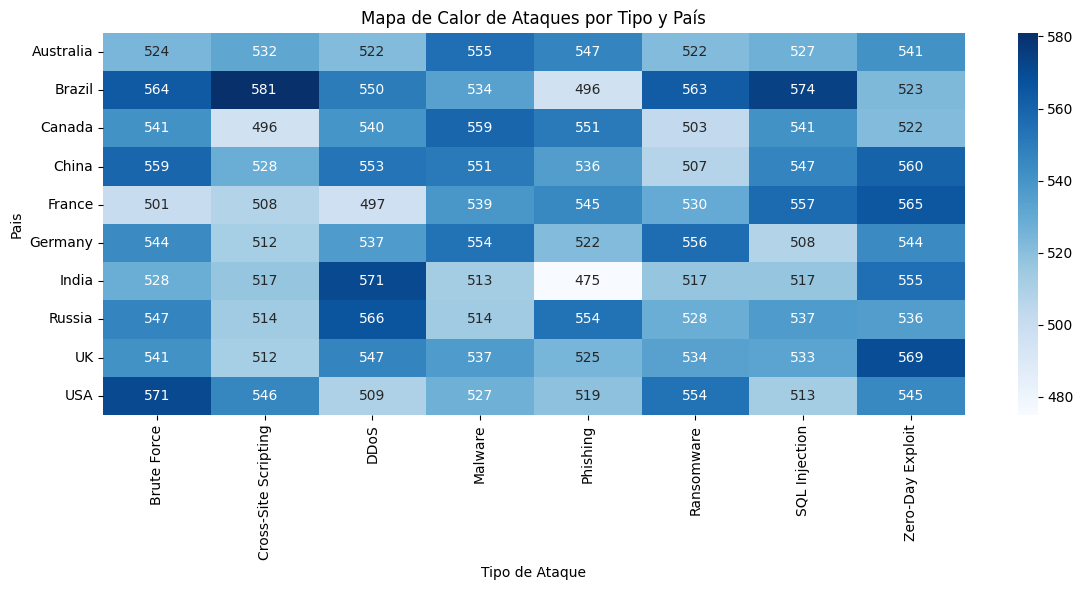

In [14]:
#Creamos mapa de calor para ver las cantidades por tipo y pais
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap='Blues', fmt='d')
plt.title('Mapa de Calor de Ataques por Tipo y País')
plt.ylabel('Pais')
plt.xlabel('Tipo de Ataque')
plt.tight_layout()
plt.show()

Debido a que las cantidades son parecidas, con el mapa de calor vemos más claramente donde hubo más ataques y de que tipo,
 USA es el país que más ataques tubo, del tipo brute force attack.

Un ataque de fuerza bruta (Brute Force Attack) es un tipo de ataque cibernético en el que un atacante intenta adivinar contraseñas o claves probando sistemáticamente todas las combinaciones posibles hasta encontrar la correcta.



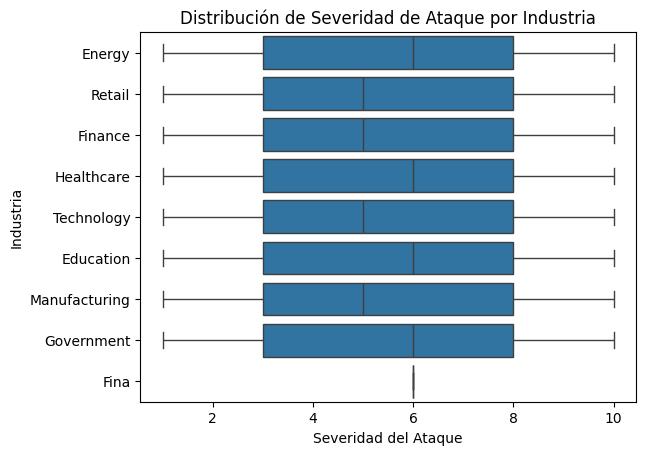

In [15]:
sns.boxplot(x='attack_severity', y='industry', data=cb)
plt.title('Distribución de Severidad de Ataque por Industria')
plt.xlabel('Severidad del Ataque')
plt.ylabel('Industria')
plt.show()



Con estas 2 visualizaciones podemos ver las industrias mas afectadas, que son Healthcare, Finance y Education

In [16]:
horas=df["hora"]
horas = pd.to_datetime(horas, format='%H').dt.hour

hsfrec = horas.value_counts()
hsfrec

,count
hora,
10,1849
22,1839
9,1830
1,1829
18,1824
13,1822
8,1814
4,1806
6,1802


In [17]:
hora_mas_frecuente = hsfrec.idxmax()
hora_mas_frecuente
print("La hora más frecuente es:", hora_mas_frecuente,':00')


La hora más frecuente es: 10 :00


In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupar por país y outcome
outcomes = df.groupby(['location', 'outcome']).size().unstack(fill_value=0)

# Mostrar tabla
print(outcomes)


outcome    Failure  Success
location                   
Australia     2153     2117
Brazil        2274     2111
Canada        2097     2156
China         2179     2162
France        2108     2134
Germany       2134     2143
India         2033     2160
Russia        2203     2093
UK            2138     2160
USA           2080     2204


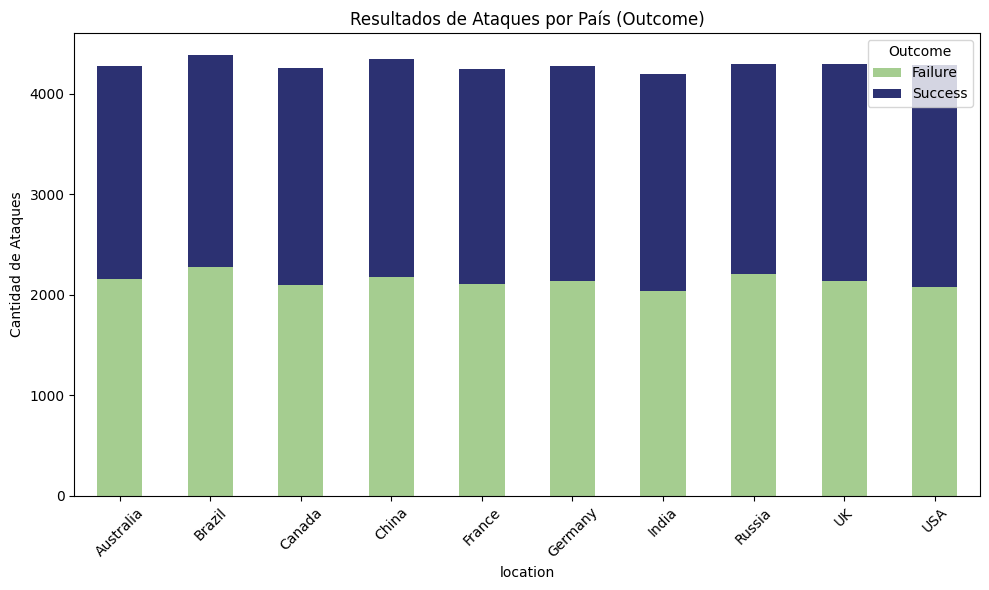

In [19]:
# Gráfico de barras apiladas por país
outcomes.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='crest')

plt.title("Resultados de Ataques por País (Outcome)")
plt.xlabel("location")
plt.ylabel("Cantidad de Ataques")
plt.legend(title="Outcome")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Transformacion de datos

In [20]:
df.columns

Index(['attack_type', 'outcome', 'data_compromised_GB', 'security_tools_used',
       'location', 'attack_severity', 'industry', 'mitigation_method', 'fecha',
       'hora'],
      dtype='object')

In [21]:
df.head()

,attack_type,outcome,data_compromised_GB,security_tools_used,location,attack_severity,industry,mitigation_method,fecha,hora
0,Phishing,Failure,15.31,Firewall,Australia,2,Energy,Containment,2024,11
1,DDoS,Success,65.05,Endpoint Detection,Brazil,10,Retail,Reset Credentials,2024,20
2,Zero-Day Exploit,Success,48.99,Firewall,Germany,7,Finance,Quarantine,2024,18
3,SQL Injection,Failure,16.29,MFA,Russia,3,Healthcare,Patch,2023,0
4,Zero-Day Exploit,Failure,87.66,Firewall,UK,6,Finance,Containment,2024,5


In [22]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [23]:
severitylabelencoder=LabelEncoder()
df['severity']=severitylabelencoder.fit_transform(cb['attack_severity'])

In [24]:
severitylabelencoder=LabelEncoder()
df['GB_data']=severitylabelencoder.fit_transform(cb['data_compromised_GB'])

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report


Nuestro objetivo será ver si tuvo éxito o no cada ataque TERMINAR

In [26]:
x=df[['attack_type','security_tools_used', 'location','attack_severity', 'industry', 'mitigation_method', 'fecha', 'hora']] #variables independientes
y=df["outcome"]       #variable objetivo
#Separamos las variables


Transformamos las variables categóricas

Al tranformar las variables con onehotencoder se soluciono el error de RAM, que antes lo habiamos hecho con get dummies

In [27]:
from sklearn.preprocessing import OneHotEncoder
columnas_categoricas = ['attack_type', 'security_tools_used', 'location', 'industry','mitigation_method']
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
#Transformamos la información categorica
x_encoded_cat = onehot_encoder.fit_transform(x[columnas_categoricas])
#Pasamos de vuelta a Dataframe y combinamos los features numericos con los categoricos
x_encoded_cat_df = pd.DataFrame(x_encoded_cat, columns=onehot_encoder.get_feature_names_out(columnas_categoricas))
x_encoded = pd.concat([x_encoded_cat_df, x[['attack_severity', 'fecha', 'hora']].reset_index(drop=True)], axis=1)

print(x_encoded.head())

   attack_type_Brute Force  attack_type_Cross-Site Scripting  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   

   attack_type_DDoS  attack_type_Malware  attack_type_Phishing  \
0               0.0                  0.0                   1.0   
1               1.0                  0.0                   0.0   
2               0.0                  0.0                   0.0   
3               0.0                  0.0                   0.0   
4               0.0                  0.0                   0.0   

   attack_type_Ransomware  attack_type_SQL Injection  \
0                     0.0                        0.0   
1                     0.0                        0.0   
2                     0.0                        0

En este caso usaremos SVM porque tenemos un dataset de pocas dimensiones y con márgen claro entre clases, para lo cual consideramos la mejor opción.




Usamos StandardScaler porque SVM es sensible a la escala.

kernel='rbf' permite capturar relaciones no lineales (muy útil en ciberseguridad).

Podés ajustar los hiperparámetros C y gamma para mejorar el rendimiento (GridSearchCV).



In [28]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1, gamma='scale'))

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

In [30]:
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(C=1))])

Usamos SVM


In [31]:
x_train.shape

(34271, 44)

In [32]:
x_test.shape

(8568, 44)

Predecimos el modelo

In [33]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Failure       0.50      0.52      0.51      4254
     Success       0.50      0.48      0.49      4314

    accuracy                           0.50      8568
   macro avg       0.50      0.50      0.50      8568
weighted avg       0.50      0.50      0.50      8568



In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2196 2058]
 [2237 2077]]


Métricas

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

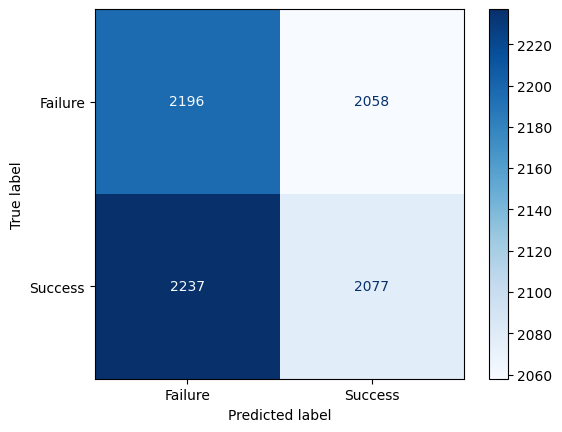

In [41]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap="Blues")

In [42]:
print(y_train.value_counts(normalize=True))


outcome
Failure    0.500277
Success    0.499723
Name: proportion, dtype: float64


Hicimos un análisis mediante el cual llegamos a la conlusión de que el dataset con el que trabajamos ya esta previamente limpio.
Por eso consideramos que la prediccion hecha fue un tanto errónea. Por lo tanto todas las métricas son parecidas,el modelo esta sobreentrenado y no da valores correctos.
Recomendamos buscar mas información de los ataques durante esos años asi evaluamos nuevamente el modelo.